In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
# deck_size = 60
deck = [0] * 60
deck[0] = 100
deck_sum = [0] * 60
num_shuffles = 10
counter = iterations = 100000

In [6]:
def sigmoid(x):
    k = 200
    return 1 / (1 + math.exp(-k*x))

In [7]:
# takes an array (deck) and splits it into two halvs, according to the binomial distribution
def deck_cut(d):
    cut_point = np.random.binomial(len(d),0.5)
    deck_a = d[:cut_point]
    deck_b = d[cut_point:]
    return deck_a,deck_b

In [8]:
# riffle shuffle according to the algorithms laid out in the various papers about card shuffling
def riffle(a,b):
    shuffled_deck = []
    deck_size = len(a) + len(b)
    while(len(shuffled_deck) != deck_size):
        prob_a = len(a)/(len(a)+len(b))
        prob_b = len(b)/(len(a)+len(b))
        if np.random.choice([0,1],p=[prob_a,prob_b]):
            shuffled_deck.append(b[0])
            b = b[1:]
        else:
            shuffled_deck.append(a[0])
            a = a[1:]
    return shuffled_deck

In [9]:
# takes in two decks (arrays) and riffle shuffles them together.
def modified_riffle(a,b):
    shuffled_deck = []
    deck_size = len(a) + len(b)
    choose_a = 0
    choose_b = 0
    while(len(shuffled_deck) != deck_size):
        proportion_a = len(a)/(len(a)+len(b))
        proportion_b = len(b)/(len(a)+len(b))
        if proportion_a == 0:
            prob_a = 0
            prob_b = 1
        elif proportion_b == 0:
            prob_a = 1
            prob_b = 0
        elif proportion_a > proportion_b:
            prob_a = 0.9
            prob_b = 0.1
        elif proportion_a <= proportion_b:
            prob_a = 0.1
            prob_b = 0.9
        if np.random.choice([0,1],p=[prob_a,prob_b]):
            shuffled_deck.append(b[0])
            b = b[1:]
        else:
            shuffled_deck.append(a[0])
            a = a[1:]
    return shuffled_deck

In [10]:
def streak_test(a,b,f):
    if f == 1:
        print('riffle')
        d = riffle(a,b)
    # d = sigmoid_riffle(a,b)
    # d = riffle(a,b)
    elif f == 2:
        print('modified_riffle')
        d = modified_riffle(a,b)
    else:
        print('f must be 1 or 2')
        return
    i = 1
    s = d[0]
    streak = 1
    streak_array = [0] * 20
    while (i != len(d)):
        if s != d[i]:
            streak_array[streak] = streak_array[streak] + 1
            s = d[i]
            streak = 1
        else:
            streak = streak + 1
        i = i + 1
    streak_array[streak] = streak_array[streak] + 1
    return np.divide(streak_array,len(d))

In [14]:
np.set_printoptions(precision=5,suppress=True)
riffle_streak = streak_test([0]*10000,[1]*10000,1)

#print(streak_test([0]*10000,[1]*10000,1))
#print(streak_test([0]*10000,[1]*10000,2))

riffle


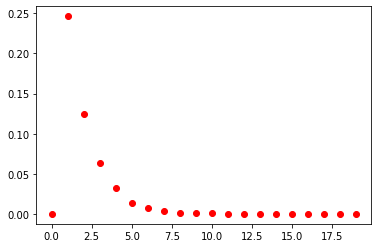

In [15]:
plt.plot(riffle_streak,'ro')
plt.show()